Final Project

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

Importing the data from csv file:

In [2]:
data = pd.read_csv('WorldPopulationData.csv')
countrydata = pd.read_csv('countries.csv')
print(data)

                      Country      Pop2013  Area_sqkm  PopGrowthRate  \
0                 Afghanistan   31,108,077    652,230           2.25   
1                     Albania    3,011,405     28,748           0.29   
2                     Algeria   38,087,812  2,381,741           1.90   
3              American Samoa       54,719        199          -0.40   
4                     Andorra       85,293        468           0.22   
5                      Angola   18,565,269  1,246,700           2.78   
6                    Anguilla       15,754         91           2.11   
7         Antigua and Barbuda       90,156        443           1.26   
8                   Argentina   42,610,981  2,780,400           0.98   
9                     Armenia    2,974,184     29,743           0.14   
10                      Aruba      109,153        180           1.39   
11                  Australia   22,262,501  7,741,220           1.11   
12                    Austria    8,221,646     83,871           

In [3]:
data_cleaned = data.fillna(0)
data_cleaned = data_cleaned.fillna('0')
data_cleaned = data_cleaned.dropna()
data_cleaned['Percent Urban'] = data_cleaned['Percent Urban'].str.replace('%','')
data_cleaned['Percent Urban'] = data_cleaned['Percent Urban'].astype(float)
data_cleaned['GDP_PPP_percapita'] = data_cleaned['GDP_PPP_percapita'].str.replace('$','')
data_cleaned['GDP_PPP_percapita'] = data_cleaned['GDP_PPP_percapita'].str.replace(',','')
data_cleaned['GDP_PPP_percapita'] = data_cleaned['GDP_PPP_percapita'].str.rstrip()
data_cleaned['GDP_PPP_percapita'] = data_cleaned['GDP_PPP_percapita'].str.lstrip()
data_cleaned['GDP_PPP_percapita'] = pd.to_numeric(data_cleaned['GDP_PPP_percapita'], errors='coerce')
data_cleaned = data_cleaned.fillna(0)
data_cleaned = data_cleaned.fillna('0')
data_cleaned = data_cleaned.dropna()
print(data_cleaned)

                      Country      Pop2013  Area_sqkm  PopGrowthRate  \
0                 Afghanistan   31,108,077    652,230           2.25   
1                     Albania    3,011,405     28,748           0.29   
2                     Algeria   38,087,812  2,381,741           1.90   
3              American Samoa       54,719        199          -0.40   
4                     Andorra       85,293        468           0.22   
5                      Angola   18,565,269  1,246,700           2.78   
6                    Anguilla       15,754         91           2.11   
7         Antigua and Barbuda       90,156        443           1.26   
8                   Argentina   42,610,981  2,780,400           0.98   
9                     Armenia    2,974,184     29,743           0.14   
10                      Aruba      109,153        180           1.39   
11                  Australia   22,262,501  7,741,220           1.11   
12                    Austria    8,221,646     83,871           

In [4]:
data_cleaned = pd.merge(countrydata, data_cleaned, on='Country')
data_cleaned.describe()

,latitude,longitude,PopGrowthRate,BirthRate,DeathRate,NetMigrationRate,MaternalMortalityRate,IMR,LifeExpectancy,TotalFertilityRate,AdultObesityRate,HealthExpend,ChildUnderwt,ChildUnderwtYr,GDP_PPP_percapita,Percent Urban
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,19.138062,12.121176,1.111280,19.373460,7.850900,-0.231611,134.696682,24.298389,70.311422,2.529479,16.837915,5.991469,7.717062,1169.758294,17747.867299,57.143128
std,24.534751,74.263359,1.122393,9.902699,3.239102,6.549886,212.256007,24.603655,13.255960,1.323625,14.258537,3.711632,10.950068,991.784406,18924.157720,25.726164
min,-40.900557,-177.156097,-3.070000,0.000000,0.000000,-22.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.372880,-33.308750,0.265000,11.375000,5.685000,-2.135000,6.000000,5.930000,66.355000,1.675000,4.300000,4.050000,0.000000,0.000000,3700.000000,36.950000
50%,18.109581,18.490410,1.000000,17.120000,7.470000,0.000000,37.000000,14.210000,74.230000,2.080000,17.900000,5.900000,2.300000,2004.000000,10600.000000,57.000000
75%,40.106102,47.175437,1.905000,24.750000,9.525000,0.995000,180.000000,39.430000,78.090000,2.980000,25.350000,8.350000,12.200000,2007.000000,27500.000000,77.050000
max,71.706936,179.414413,4.850000,46.840000,17.360000,33.320000,1100.000000,119.410000,89.630000,7.030000,74.600000,18.100000,45.300000,2011.000000,103900.000000,100.000000


In [5]:
data_cleaned.dtypes

Code                      object
latitude                 float64
longitude                float64
Country                   object
Pop2013                   object
Area_sqkm                 object
PopGrowthRate            float64
BirthRate                float64
DeathRate                float64
NetMigrationRate         float64
MaternalMortalityRate    float64
IMR                      float64
LifeExpectancy           float64
TotalFertilityRate       float64
AdultObesityRate         float64
HealthExpend             float64
ChildUnderwt             float64
ChildUnderwtYr           float64
GDP PPP                   object
GDP_PPP_percapita        float64
Percent Urban            float64
dtype: object

In [6]:
country_index = data_cleaned.set_index('Country')

In [7]:
usa_china_india = country_index.loc[['United States','China','India']]

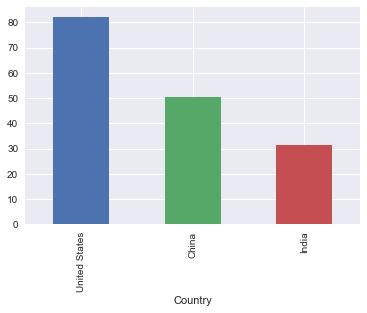

In [8]:
usa_china_india['Percent Urban'].plot.bar()

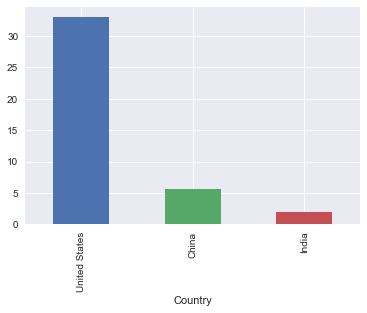

In [9]:
usa_china_india['AdultObesityRate'].plot.bar()

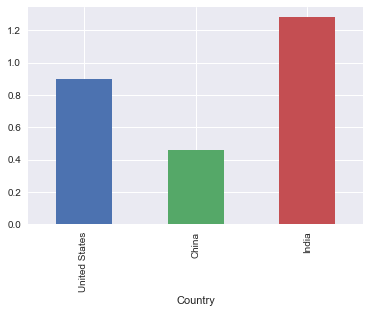

In [10]:
usa_china_india['PopGrowthRate'].plot.bar()

Showcasing a Linear regression of PopulationGrowthRate and BirthRate

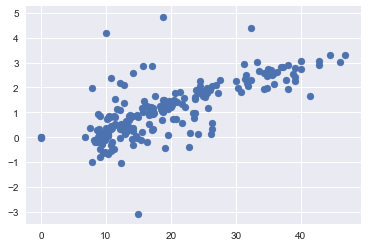

In [11]:
pop = data_cleaned['PopGrowthRate']
birth = data_cleaned['BirthRate']
plt.scatter(birth,pop)

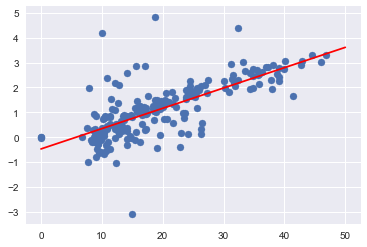

In [12]:
model = LinearRegression(fit_intercept=True)
model.fit(birth[:,np.newaxis],pop)
xfit=np.linspace(0,50,20)
yfit=model.predict(xfit[:,np.newaxis])
plt.scatter(birth, pop)
plt.plot(xfit, yfit,'r')

Equation of the line

In [13]:
slope = model.coef_[0]
intercept = model.intercept_
print('y=',intercept,'+',slope,'x')

('y=', -0.4722916678956781, '+', 0.08173920982582028, 'x')


Naive Bayes Classification to classify based on Developed or Developing countries

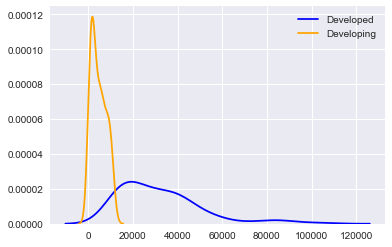

In [14]:
data_cleaned['Development'] = np.where(data_cleaned['GDP_PPP_percapita']>=12000, 'Developed', 'Developing')
developed_countries = data_cleaned.loc[data_cleaned['Development'] == 'Developed']
developed_countries_GDP = developed_countries['GDP_PPP_percapita']
developing_countries = data_cleaned.loc[data_cleaned['Development'] == 'Developing']
developing_countries_GDP = developing_countries['GDP_PPP_percapita']
ax = sns.kdeplot(developed_countries_GDP,color="blue",label='Developed')
ax = sns.kdeplot(developing_countries_GDP,color="orange",label='Developing')

In [15]:
GNB = GaussianNB()
GDP = data_cleaned['GDP_PPP_percapita']
print(GDP)

0      37200.0
1      49800.0
2       1100.0
3      18300.0
4      12200.0
5       8200.0
6       5900.0
7       6500.0
8      18400.0
9       8000.0
10     43100.0
11     43300.0
12     25300.0
13     10700.0
14      8400.0
15     25800.0
16      2100.0
17     38500.0
18      1400.0
19     14500.0
20     29200.0
21       600.0
22      1700.0
23     86000.0
24     55300.0
25      5200.0
26     12100.0
27      6800.0
28     17100.0
29     15900.0
        ...   
181     1100.0
182    10300.0
183     2300.0
184     1000.0
185    10000.0
186     8900.0
187     9900.0
188     7700.0
189    15200.0
190    20400.0
191     3400.0
192    39400.0
193     1600.0
194     7500.0
195     1400.0
196    50700.0
197    16200.0
198     3600.0
199    12000.0
200    13800.0
201    42300.0
202     3600.0
203     5000.0
204     3800.0
205     6300.0
206        0.0
207     2300.0
208    11600.0
209     1700.0
210      600.0
Name: GDP_PPP_percapita, Length: 211, dtype: float64


In [16]:
GNB.fit(GDP[:,np.newaxis], data_cleaned['Development'])
rng = np.random.RandomState(0)
Xtest = [10000, 0] + [4000, 0] * rng.rand(10, 2)

Xtest

array([[12195.25401571,     0.        ],
       [12411.05350429,     0.        ],
       [11694.61919736,     0.        ],
       [11750.34884505,     0.        ],
       [13854.651042  ,     0.        ],
       [13166.90015233,     0.        ],
       [12272.17824438,     0.        ],
       [10284.14423279,     0.        ],
       [10080.87358976,     0.        ],
       [13112.6270038 ,     0.        ]])

In [17]:
yprob = GNB.predict_proba(Xtest)

In [18]:
yprob.round(3)

array([[0.446, 0.554],
       [0.487, 0.513],
       [0.358, 0.642],
       [0.367, 0.633],
       [0.761, 0.239],
       [0.636, 0.364],
       [0.46 , 0.54 ],
       [0.183, 0.817],
       [0.166, 0.834],
       [0.626, 0.374]])

In [19]:
GNB.classes_

array(['Developed', 'Developing'], dtype='|S10')

In [20]:
rng = np.random.RandomState(0)
Xtest = [20000, 0] + [4000, 0] * rng.rand(10, 2)
yprob = GNB.predict_proba(Xtest)
yprob.round(3)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [21]:
GNB.classes_

array(['Developed', 'Developing'], dtype='|S10')

Supervised Classification based on Percent Urban

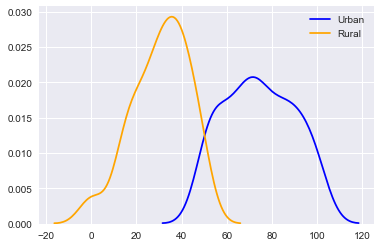

In [22]:
data_cleaned['Urban/Rural'] = np.where(data_cleaned['Percent Urban']>=50, 'Urban', 'Rural')
urban_countries = data_cleaned.loc[data_cleaned['Urban/Rural'] == 'Urban']['Percent Urban']
rural_countries = data_cleaned.loc[data_cleaned['Urban/Rural'] == 'Rural']['Percent Urban']
bx = sns.kdeplot(urban_countries,color="blue",label='Urban')
bx = sns.kdeplot(rural_countries,color="orange",label='Rural')

In [23]:
GNB = GaussianNB()
Urban_Rural = data_cleaned['Percent Urban']
print(Urban_Rural)

0       88.0
1       84.4
2       23.5
3       30.0
4      100.0
5       52.0
6       64.1
7       59.2
8       92.0
9       93.0
10      68.0
11      89.0
12      47.0
13      53.6
14      49.0
15      44.0
16      28.4
17      97.0
18      26.5
19      73.1
20      88.7
21      10.9
22      44.9
23     100.0
24      76.0
25      67.0
26      87.0
27      35.6
28      61.7
29      75.0
       ...  
181     38.0
182     34.1
183     26.5
184      0.0
185     28.3
186     48.7
187     66.3
188     23.0
189     71.5
190     14.0
191     50.0
192      0.0
193     26.7
194     68.9
195     15.6
196     82.0
197     92.0
198     36.2
199     49.0
200     93.0
201     41.0
202     31.0
203     26.0
204      0.0
205     20.0
206      0.0
207     32.3
208     62.0
209     39.2
210     38.6
Name: Percent Urban, Length: 211, dtype: float64


In [181]:
GNB.fit(Urban_Rural[:,np.newaxis], data_cleaned['Urban/Rural'])
rng = np.random.RandomState(0)
Xtest = [45, 0] + [20, 0] * rng.rand(10, 2)

Xtest

array([[55.97627008,  0.        ],
       [57.05526752,  0.        ],
       [53.47309599,  0.        ],
       [53.75174423,  0.        ],
       [64.27325521,  0.        ],
       [60.83450076,  0.        ],
       [56.36089122,  0.        ],
       [46.42072116,  0.        ],
       [45.40436795,  0.        ],
       [60.56313502,  0.        ]])

In [182]:
yprob = GNB.predict_proba(Xtest)
yprob.round(3)

array([[0.999, 0.001],
       [0.999, 0.001],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.994, 0.006],
       [0.998, 0.002],
       [0.999, 0.001],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.998, 0.002]])

In [183]:
GNB.classes_

array(['Rural', 'Urban'], dtype='|S5')

In [184]:
rng = np.random.RandomState(0)
Xtest = [20, 0] + [10, 0] * rng.rand(10, 2)
yprob = GNB.predict_proba(Xtest)
yprob.round(3)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [185]:
GNB.classes_

array(['Rural', 'Urban'], dtype='|S5')

Unsupervised Learning using K means Clustering to cluster countries with differeing GDP_PPP

In [186]:
GDP_PPP = data_cleaned['GDP_PPP_percapita']
GDP_PPP_values = GDP_PPP.as_matrix()
GDP_PPP_indices = np.array(GDP_PPP.index)
CoordinatesGDP = []
for i in range(len(GDP_PPP_indices)):
    CoordinatesGDP.append([GDP_PPP_indices[i],GDP_PPP_values[i]])
print CoordinatesGDP

[[0, 37200.0], [1, 49800.0], [2, 1100.0], [3, 18300.0], [4, 12200.0], [5, 8200.0], [6, 5900.0], [7, 6500.0], [8, 18400.0], [9, 8000.0], [10, 43100.0], [11, 43300.0], [12, 25300.0], [13, 10700.0], [14, 8400.0], [15, 25800.0], [16, 2100.0], [17, 38500.0], [18, 1400.0], [19, 14500.0], [20, 29200.0], [21, 600.0], [22, 1700.0], [23, 86000.0], [24, 55300.0], [25, 5200.0], [26, 12100.0], [27, 6800.0], [28, 17100.0], [29, 15900.0], [30, 8900.0], [31, 43400.0], [32, 800.0], [33, 46200.0], [34, 9100.0], [35, 18700.0], [36, 2400.0], [37, 9300.0], [38, 11000.0], [39, 12800.0], [40, 10200.0], [41, 4200.0], [42, 27500.0], [43, 27600.0], [44, 39700.0], [45, 2700.0], [46, 38300.0], [47, 14400.0], [48, 9800.0], [49, 7600.0], [50, 10200.0], [51, 22100.0], [52, 6700.0], [53, 2500.0], [54, 800.0], [55, 31100.0], [56, 1200.0], [57, 37000.0], [58, 4900.0], [59, 30500.0], [60, 36100.0], [61, 16800.0], [62, 37500.0], [63, 13900.0], [64, 6000.0], [65, 44600.0], [66, 3400.0], [67, 43000.0], [68, 37400.0], [69, 

In [187]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(CoordinatesGDP)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

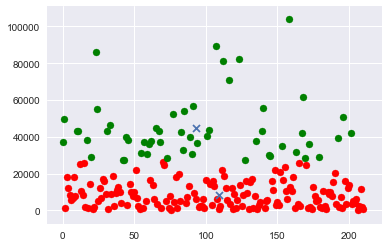

In [188]:
colors= ['red','green']
for i in range(len(GDP_PPP_indices)):
    plt.scatter(CoordinatesGDP[i][0],CoordinatesGDP[i][1],c=colors[labels[i]])
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x")
plt.show()

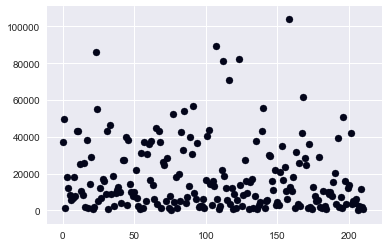

In [189]:
predicted_values = kmeans.predict(CoordinatesGDP)
for i in range(len(GDP_PPP_indices)):
    plt.scatter(CoordinatesGDP[i][0],CoordinatesGDP[i][1],c=predicted_values[i])

Unsupervised Learning using K means Clustering to cluster countries with differeing Maternal Mortality Rate

In [190]:
Maternal_Mortality_Rate = data_cleaned['MaternalMortalityRate']
Maternal_Mortality_Rate_values = Maternal_Mortality_Rate.as_matrix()
Maternal_Mortality_Rate_indices = np.array(Maternal_Mortality_Rate.index)
CoordinatesMMR = []
for i in range(len(Maternal_Mortality_Rate_indices)):
    CoordinatesMMR.append([Maternal_Mortality_Rate_indices[i],Maternal_Mortality_Rate_values[i]])
print CoordinatesMMR

[[0, 0.0], [1, 12.0], [2, 460.0], [3, 0.0], [4, 0.0], [5, 27.0], [6, 30.0], [7, 450.0], [8, 77.0], [9, 0.0], [10, 4.0], [11, 7.0], [12, 0.0], [13, 43.0], [14, 8.0], [15, 51.0], [16, 240.0], [17, 8.0], [18, 300.0], [19, 11.0], [20, 20.0], [21, 800.0], [22, 350.0], [23, 0.0], [24, 24.0], [25, 180.0], [26, 56.0], [27, 180.0], [28, 160.0], [29, 190.0], [30, 53.0], [31, 12.0], [32, 890.0], [33, 8.0], [34, 0.0], [35, 25.0], [36, 690.0], [37, 37.0], [38, 92.0], [39, 40.0], [40, 73.0], [41, 79.0], [42, 10.0], [43, 5.0], [44, 7.0], [45, 200.0], [46, 12.0], [47, 0.0], [48, 150.0], [49, 97.0], [50, 110.0], [51, 2.0], [52, 66.0], [53, 0.0], [54, 240.0], [55, 6.0], [56, 350.0], [57, 5.0], [58, 26.0], [59, 0.0], [60, 8.0], [61, 230.0], [62, 12.0], [63, 24.0], [64, 67.0], [65, 0.0], [66, 350.0], [67, 0.0], [68, 0.0], [69, 610.0], [70, 240.0], [71, 3.0], [72, 120.0], [73, 0.0], [74, 790.0], [75, 280.0], [76, 64.0], [77, 0.0], [78, 100.0], [79, 17.0], [80, 350.0], [81, 21.0], [82, 220.0], [83, 6.0], [8

In [191]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(CoordinatesMMR)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

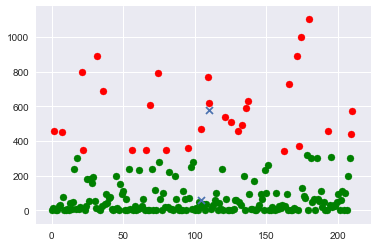

In [192]:
colors= ['green','red']
for i in range(len(Maternal_Mortality_Rate_indices)):
    plt.scatter(CoordinatesMMR[i][0],CoordinatesMMR[i][1],c=colors[labels[i]])
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x")
plt.show()

In [193]:
!pip install folium

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [194]:
import folium as folium

In [195]:
folium_map = folium.Map(location=[0, 0],
                        zoom_start=2,
                        tiles="CartoDB dark_matter")

In [196]:
folium_map

In [197]:
for i in range(len(data_cleaned)):
    if data_cleaned.iloc[i]['Development'] == 'Developed':
        color = 'green'
    else:
        color = 'red'
    marker = folium.CircleMarker(location=[data_cleaned.iloc[i]['latitude'], data_cleaned.iloc[i]['longitude']],color=color,fill=True)
    marker.add_to(folium_map)

In [198]:
folium_map